<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-01-01 17:10:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  82.1MB/s    in 2.5s    

2026-01-01 17:10:19 (82.1 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
#!pip install pandas

In [ ]:
#!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name, type
FROM sqlite_master
"""
pd.read_sql_query(QUERY, conn)

,name,type
0,main,table


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [ ]:
def clean_numeric(series):
    """Convert to numeric safely."""
    return pd.to_numeric(series, errors="coerce")

def cap_series(series, q=0.99):
    """Cap extreme outliers for readable plots."""
    s = series.dropna()
    cap = s.quantile(q)
    return np.minimum(series, cap), cap

In [10]:
df_box = pd.read_sql_query("SELECT CompTotal FROM main", conn)
df_box = pd.read_sql_query("SELECT CompTotal FROM main", conn)
print("rows:", len(df_box))
print(df_box.head())
print("non-null:", df_box["CompTotal"].notna().sum())
print("dtype:", df_box["CompTotal"].dtype)


rows: 65437
   CompTotal
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
non-null: 33740
dtype: float64


In [11]:
df_box["CompTotal"] = pd.to_numeric(df_box["CompTotal"], errors="coerce")
print("non-null after numeric:", df_box["CompTotal"].notna().sum())


non-null after numeric: 33740


In [17]:
import pandas as pd

s = df_box["CompTotal"].dropna()

print("count:", s.shape[0])
print("min:", s.min())
print("p25:", s.quantile(0.25))
print("median:", s.median())
print("p75:", s.quantile(0.75))
print("p95:", s.quantile(0.95))
print("p99:", s.quantile(0.99))
print("max:", s.max())


count: 33740
min: 0.0
p25: 60000.0
median: 110000.0
p75: 250000.0
p95: 3600000.0
p99: 117728100.00000012
max: 1.0000000000000002e+150


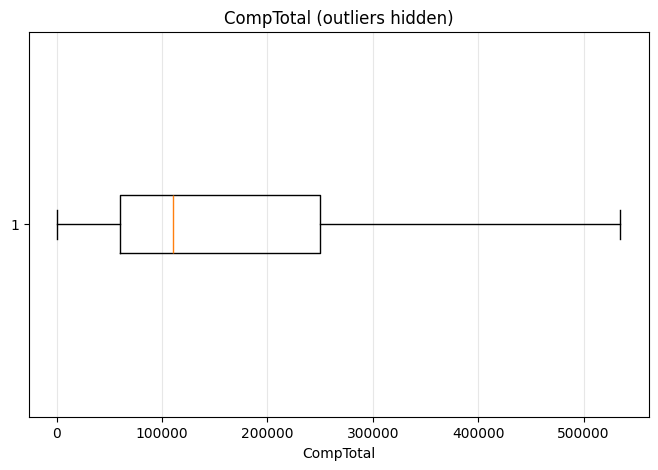

In [19]:
# use this plot because it removed the null values and  the outliers .

s = df_box["CompTotal"].dropna()

plt.figure(figsize=(8, 5))
plt.boxplot(s, vert=False, showfliers=False)
plt.title("CompTotal (outliers hidden)")
plt.xlabel("CompTotal")
plt.grid(axis="x", alpha=0.3)
plt.show()


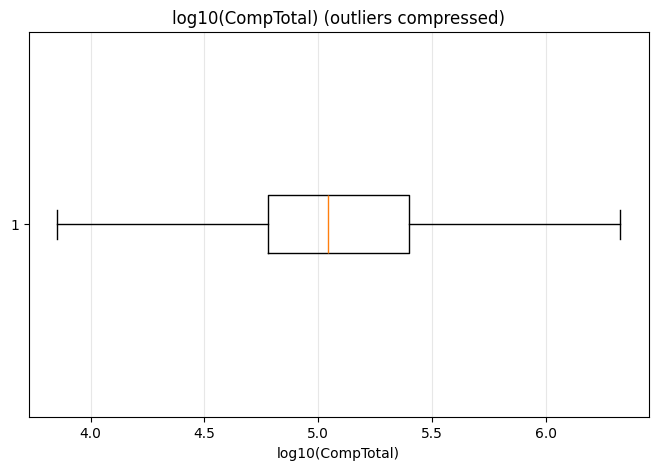

In [21]:
# Log Scale (best when values span orders of magnitude)

s = df_box["CompTotal"].dropna()
s_pos = s[s > 0]  # log requires >0

plt.figure(figsize=(8, 5))
plt.boxplot(np.log10(s_pos), vert=False, showfliers=False)
plt.title("log10(CompTotal) (outliers compressed)")
plt.xlabel("log10(CompTotal)")
plt.grid(axis="x", alpha=0.3)
plt.show()


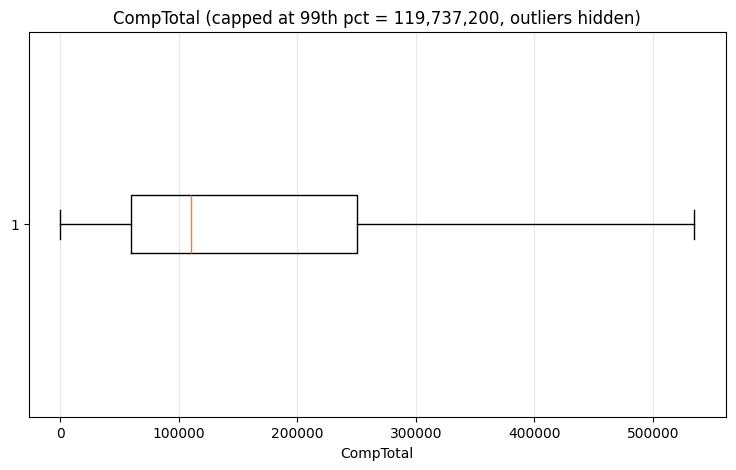

In [29]:
df = pd.read_sql_query("SELECT CompTotal FROM main", conn)
df["CompTotal"] = clean_numeric(df["CompTotal"])
df = df.dropna()
df = df[df["CompTotal"] > 0]

comp_plot, cap = cap_series(df["CompTotal"], q=0.99)

plt.figure(figsize=(9,5))
plt.boxplot(comp_plot, vert=False, showfliers=False)
plt.title(f"CompTotal (capped at 99th pct = {cap:,.0f}, outliers hidden)")
plt.xlabel("CompTotal")
plt.grid(axis="x", alpha=0.3)
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [13]:
df_age = pd.read_sql_query("SELECT Age FROM main WHERE Age IS NOT NULL", conn)
print("unique Age values (first 30):")
print(df_age["Age"].value_counts().head(30))


unique Age values (first 30):
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64


In [14]:
import numpy as np

s = df_age["Age"].astype(str)

# midpoint for ranges like "25-34"
range_mid = s.str.extract(r"(\d+)\s*-\s*(\d+)").astype(float)
df_age["AgeNumeric"] = range_mid.mean(axis=1)

# handle "65 years or older" / "65 or older"
older = s.str.contains(r"or older", case=False, na=False)
df_age.loc[older, "AgeNumeric"] = 70

# handle "Under 18"
under = s.str.contains(r"under", case=False, na=False)
df_age.loc[under, "AgeNumeric"] = 16

print("AgeNumeric non-null:", df_age["AgeNumeric"].notna().sum())


AgeNumeric non-null: 65115


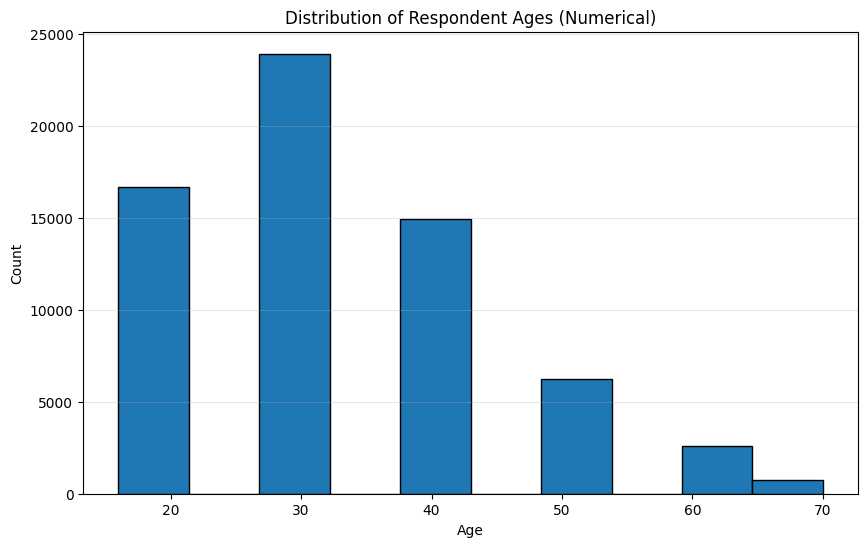

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df_age["AgeNumeric"].dropna(), bins=10, edgecolor="black")
plt.title("Distribution of Respondent Ages (Numerical)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.show()


In [23]:
#alternative way from chatGPT For the robust converter
df_age = pd.read_sql_query("SELECT Age FROM main WHERE Age IS NOT NULL", conn)
s = df_age["Age"].astype(str)

# midpoint from ranges like "25-34 years old"
m = s.str.extract(r"(\d+)\s*-\s*(\d+)").astype(float)
df_age["AgeNumeric"] = m.mean(axis=1)

# Under 18 / 65+ handling
df_age.loc[s.str.contains("Under", case=False, na=False), "AgeNumeric"] = 16
df_age.loc[s.str.contains("or older", case=False, na=False), "AgeNumeric"] = 70

print("AgeNumeric non-null:", df_age["AgeNumeric"].notna().sum())


AgeNumeric non-null: 65115


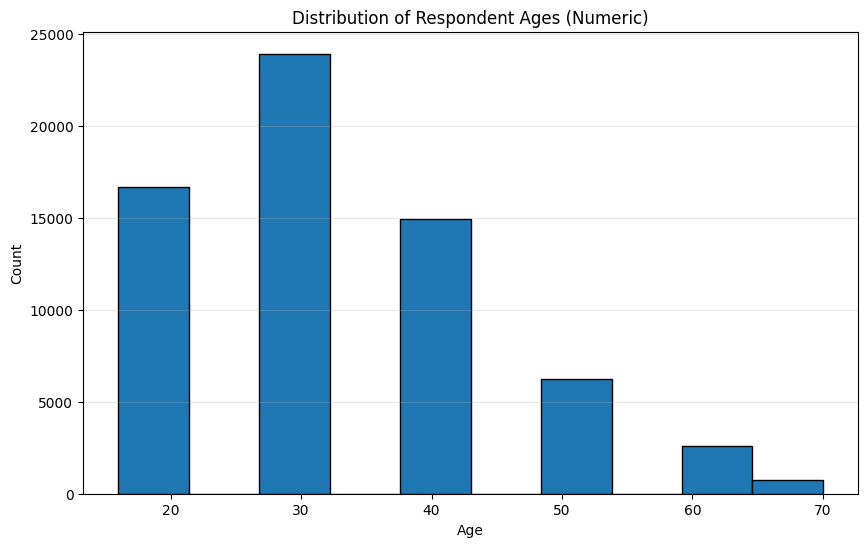

In [24]:
#Then plot


plt.figure(figsize=(10, 6))
plt.hist(df_age["AgeNumeric"].dropna(), bins=10, edgecolor="black")
plt.title("Distribution of Respondent Ages (Numeric)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.show()


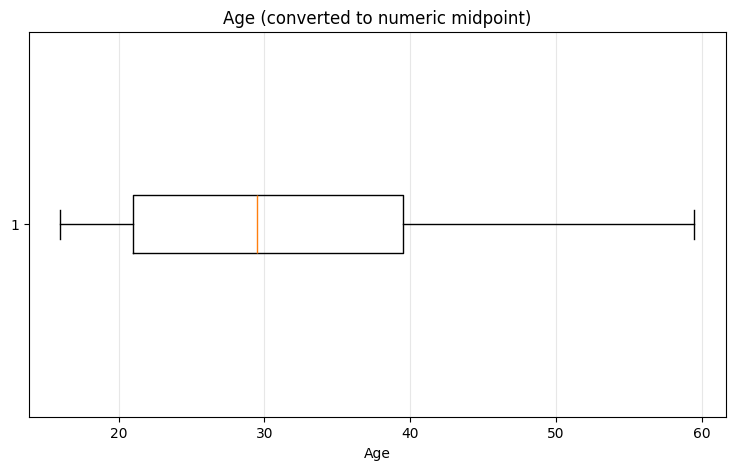

In [30]:
df = pd.read_sql_query("SELECT Age FROM main WHERE Age IS NOT NULL", conn)
s = df["Age"].astype(str)

# Midpoint for ranges like "25-34 years old"
m = s.str.extract(r"(\d+)\s*-\s*(\d+)").astype(float)
df["AgeNumeric"] = m.mean(axis=1)

# Handle special labels
df.loc[s.str.contains("Under", case=False, na=False), "AgeNumeric"] = 16
df.loc[s.str.contains("or older", case=False, na=False), "AgeNumeric"] = 70

age_numeric = df["AgeNumeric"].dropna()

plt.figure(figsize=(9,5))
plt.boxplot(age_numeric, vert=False, showfliers=False)
plt.title("Age (converted to numeric midpoint)")
plt.xlabel("Age")
plt.grid(axis="x", alpha=0.3)
plt.show()


🔹 Question:

What does the overall distribution of total compensation look like?

🔹 Purpose:Understand:

Typical compensation level (median)

Variability

Presence of extreme outliers

🔹 Interpretation:

Compensation is highly right-skewed, meaning most respondents earn within a moderate range, while a small number earn extremely high amounts. The median is much lower than the maximum, and the long upper tail suggests that senior or highly specialized roles earn disproportionately more. This indicates that averages alone would be misleading, and median and spread are more informative.

Question:

What is the age distribution of survey respondents?

🔹 Purpose:

Understand:

Typical age range

Whether the sample is dominated by early-career or late-career professionals

🔹 Interpretation:

Most respondents fall in the mid-career age range, with a concentration around late 20s to early 40s. Very young and very old respondents are less common. This suggests the survey reflects a workforce largely in active professional stages, which is important context for interpreting salary and experience results.

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipython-input-2830815965.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


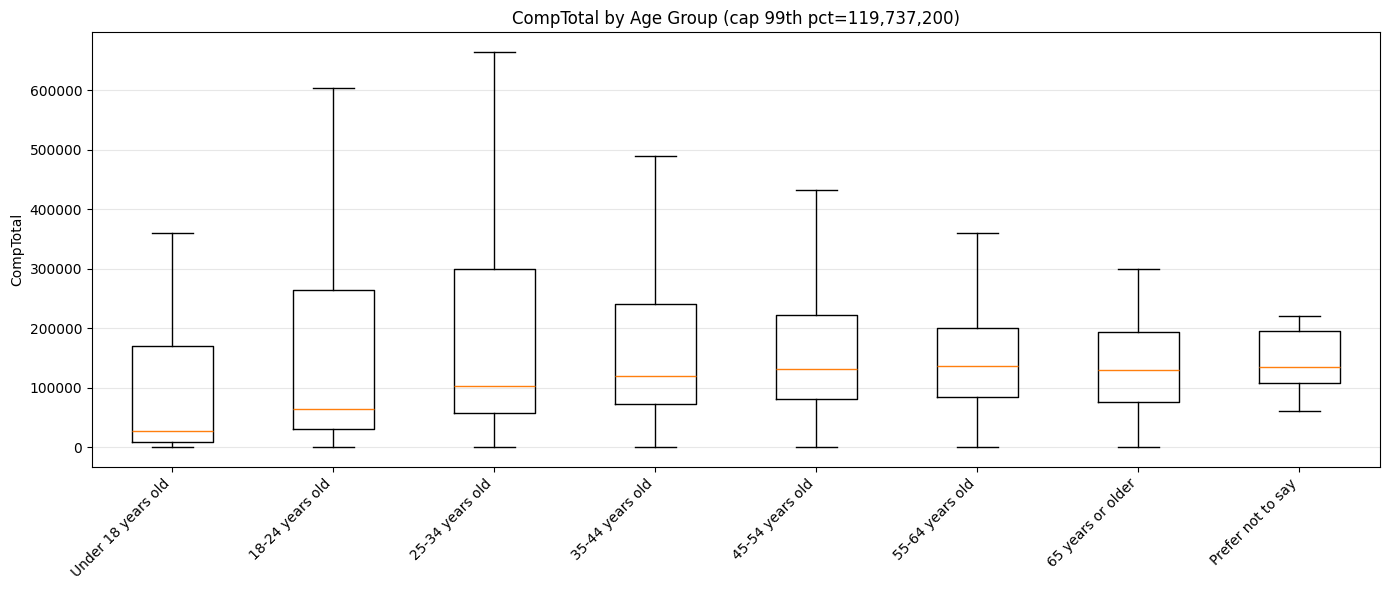

In [31]:
df = pd.read_sql_query("""
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
""", conn)

df["CompTotal"] = clean_numeric(df["CompTotal"])
df = df.dropna(subset=["Age","CompTotal"])
df = df[df["CompTotal"] > 0]

# Cap for readability
df["CompTotal_plot"], cap = cap_series(df["CompTotal"], q=0.99)

age_order = [
    "Under 18 years old","18-24 years old","25-34 years old","35-44 years old",
    "45-54 years old","55-64 years old","65 years or older","Prefer not to say"
]
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

groups = [df.loc[df["Age"]==a, "CompTotal_plot"].dropna() for a in age_order]
labels = [a for a,g in zip(age_order, groups) if len(g) > 0]
groups = [g for g in groups if len(g) > 0]

plt.figure(figsize=(14,6))
plt.boxplot(groups, labels=labels, showfliers=False)
plt.xticks(rotation=45, ha="right")
plt.title(f"CompTotal by Age Group (cap 99th pct={cap:,.0f})")
plt.ylabel("CompTotal")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Task 2.1 — CompTotal by Age Group
🔹 Question:

How does compensation vary across different age groups?

🔹 Purpose:

Understand whether compensation tends to increase with age (as a proxy for experience/seniority).

🔹 Interpretation:

Median compensation generally increases with age, particularly from early career (18–24) to mid-career (35–44 / 45–54). Older age groups show higher variability, suggesting that some individuals continue into very high-paying senior roles, while others plateau or reduce workload. This indicates experience strongly influences earning potential, but not uniformly.

Rows loaded: 33740
Rows after cleaning: 33613

Age group counts:
Age
25-34 years old       14624
35-44 years old        9324
18-24 years old        4606
45-54 years old        3495
55-64 years old        1272
65 years or older       194
Under 18 years old       84
Prefer not to say        14
Name: count, dtype: int64

99th percentile of CompTotal: 119737199.99999426


/tmp/ipython-input-3757643912.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=age_order, showfliers=False)


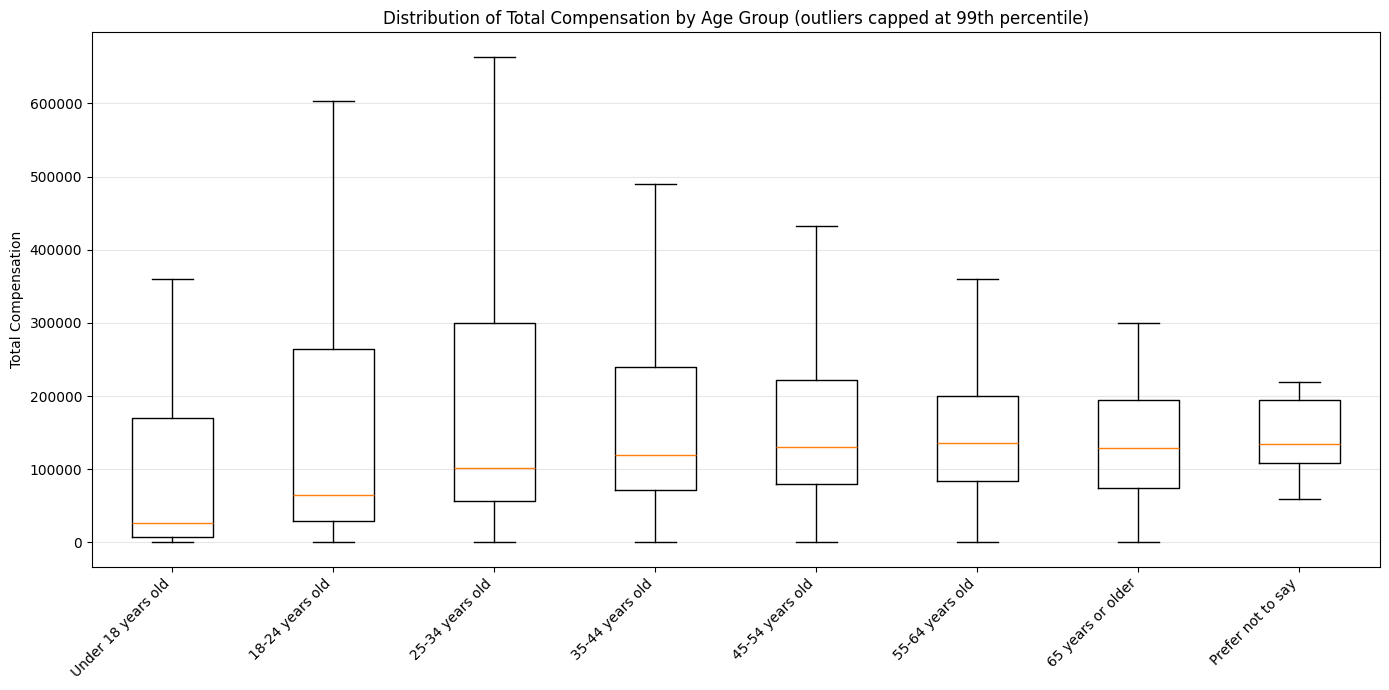

In [25]:
#Alternative way
# Load Age and CompTotal
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

print("Rows loaded:", len(df))

# Ensure CompTotal is numeric
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal"])

# Remove zero / negative compensation
df = df[df["CompTotal"] > 0]

print("Rows after cleaning:", len(df))

# Check Age groups
print("\nAge group counts:")
print(df["Age"].value_counts())

# Optional: cap extreme outliers at 99th percentile for visualization
upper = df["CompTotal"].quantile(0.99)
df["CompTotal_capped"] = np.minimum(df["CompTotal"], upper)

print("\n99th percentile of CompTotal:", upper)

# Sort Age groups in meaningful order
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
    "Prefer not to say"
]

df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

# Prepare data for boxplot
box_data = [df.loc[df["Age"] == age, "CompTotal_capped"] for age in age_order]

# Plot
plt.figure(figsize=(14, 7))
plt.boxplot(box_data, labels=age_order, showfliers=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Compensation")
plt.title("Distribution of Total Compensation by Age Group (outliers capped at 99th percentile)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


**Interpretation example**
Compensation tends to increase with age, with median values rising steadily from the 18–24 group through the 45–54 group. Older age groups also show greater variability, suggesting a wider range of seniority and roles. The 25–34 and 35–44 groups show tighter distributions, indicating more homogeneous compensation ranges.”

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipython-input-3981483213.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=levels, showfliers=False)


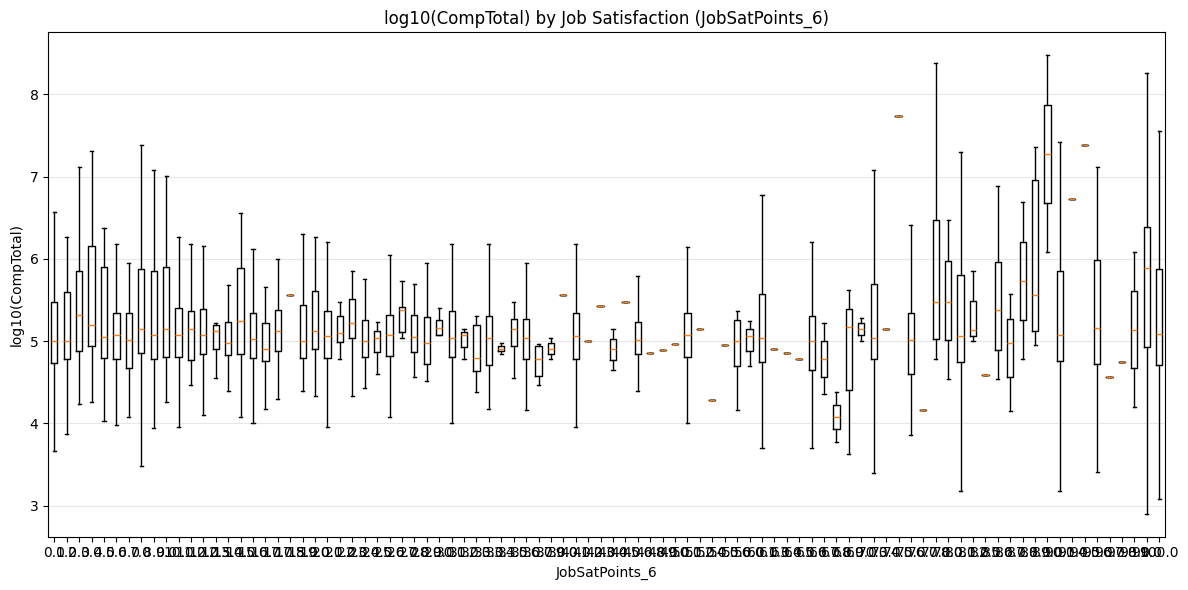

In [32]:
df = pd.read_sql_query("""
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL
""", conn)

df["CompTotal"] = clean_numeric(df["CompTotal"])
df["JobSatPoints_6"] = clean_numeric(df["JobSatPoints_6"])
df = df.dropna(subset=["JobSatPoints_6","CompTotal"])
df = df[df["CompTotal"] > 0]

# OPTIONAL: if your course expects a 0–6 scale, enforce it:
# df = df[df["JobSatPoints_6"].between(0,6)]

df["CompTotal_log10"] = np.log10(df["CompTotal"])

levels = sorted(df["JobSatPoints_6"].unique())
box_data = [df.loc[df["JobSatPoints_6"]==lv, "CompTotal_log10"].dropna() for lv in levels]

plt.figure(figsize=(12,6))
plt.boxplot(box_data, labels=levels, showfliers=False)
plt.title("log10(CompTotal) by Job Satisfaction (JobSatPoints_6)")
plt.xlabel("JobSatPoints_6")
plt.ylabel("log10(CompTotal)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [16]:
def quick_check(df, col):
    print("rows:", len(df))
    print("col exists?", col in df.columns)
    if col in df.columns:
        print("non-null:", df[col].notna().sum())
        print("sample:", df[col].dropna().head(5).tolist())

# example:
df_box = pd.read_sql_query("SELECT CompTotal FROM main", conn)
quick_check(df_box, "CompTotal")


rows: 65437
col exists? True
non-null: 33740
sample: [2040000.0, 28000.0, 85000.0, 50000.0, 110000.0]


/tmp/ipython-input-2292090450.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=levels, showfliers=False)


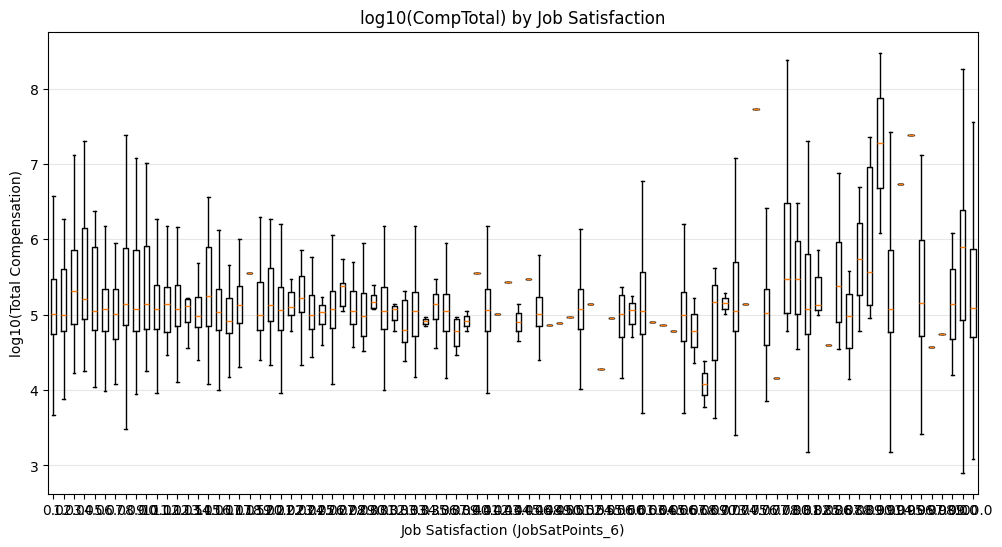

In [27]:
#Log-scale (best statistical view)
df_js["CompTotal_log"] = np.log10(df_js["CompTotal"])

levels = sorted(df_js["JobSatPoints_6"].unique())
box_data = [df_js.loc[df_js["JobSatPoints_6"] == lv, "CompTotal_log"] for lv in levels]

plt.figure(figsize=(12,6))
plt.boxplot(box_data, labels=levels, showfliers=False)
plt.title("log10(CompTotal) by Job Satisfaction")
plt.xlabel("Job Satisfaction (JobSatPoints_6)")
plt.ylabel("log10(Total Compensation)")
plt.grid(axis="y", alpha=0.3)
plt.show()


Task 2.2.2 — CompTotal by Job Satisfaction
🔹 Question:

Is higher job satisfaction associated with higher compensation?

🔹 Purpose:

Explore whether happier workers earn more, or whether compensation and satisfaction are weakly related.

🔹 Interpretation:

The relationship between compensation and job satisfaction is not strictly linear. While higher satisfaction groups tend to have slightly higher median compensation, there is substantial overlap between groups. This suggests that compensation alone does not determine job satisfaction — factors like work-life balance, role fit, and autonomy likely play major roles.

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipython-input-2335865117.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=top5, showfliers=False)


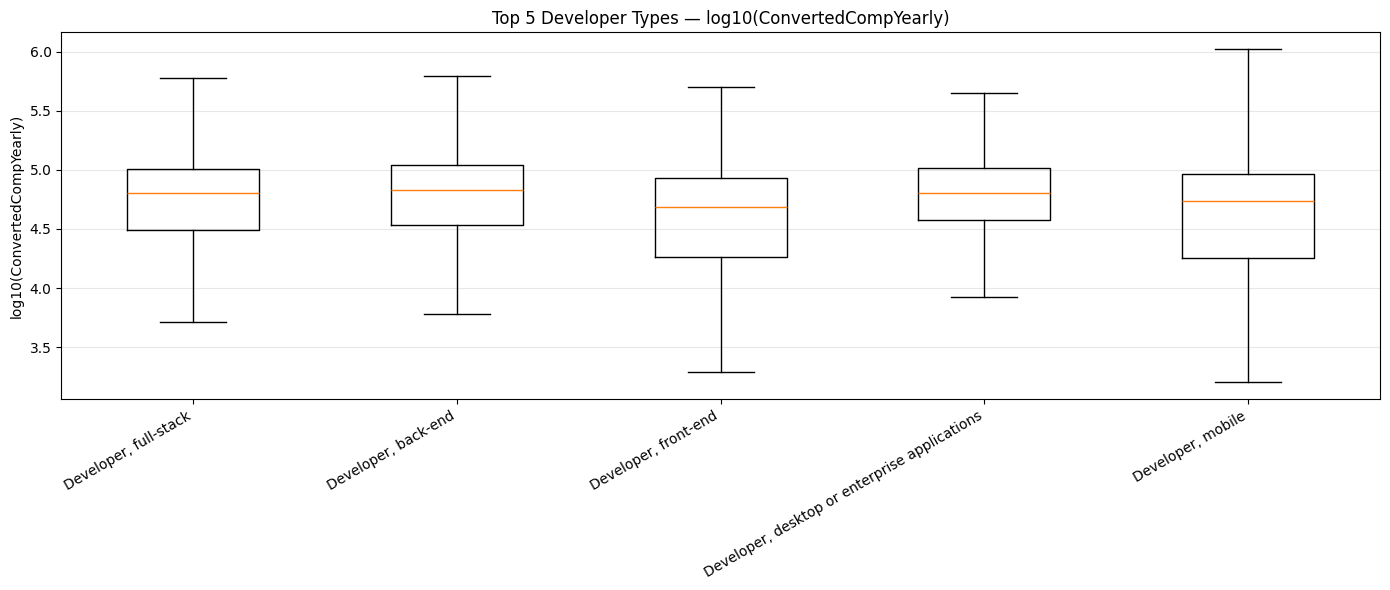

In [33]:
df = pd.read_sql_query("""
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
""", conn)

df["ConvertedCompYearly"] = clean_numeric(df["ConvertedCompYearly"])
df = df.dropna(subset=["DevType","ConvertedCompYearly"])
df = df[df["ConvertedCompYearly"] > 0]

# DevType often contains multiple roles separated by ";"
df["DevType_first"] = df["DevType"].astype(str).str.split(";").str[0].str.strip()

top5 = df["DevType_first"].value_counts().head(5).index.tolist()
df = df[df["DevType_first"].isin(top5)]

df["CCY_log10"] = np.log10(df["ConvertedCompYearly"])

groups = [df.loc[df["DevType_first"]==t, "CCY_log10"] for t in top5]

plt.figure(figsize=(14,6))
plt.boxplot(groups, labels=top5, showfliers=False)
plt.xticks(rotation=30, ha="right")
plt.title("Top 5 Developer Types — log10(ConvertedCompYearly)")
plt.ylabel("log10(ConvertedCompYearly)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Task 3.1 — ConvertedCompYearly by Developer Type
🔹 Question:

Which developer roles tend to earn more?

🔹 Purpose:

Compare compensation across different technical roles.

🔹 Interpretation:

Certain specialized roles (e.g., data, ML, or systems-focused roles) tend to show higher median compensation and wider ranges than generalist or entry-level roles. This reflects market demand for specialized technical skills and suggests role choice significantly affects earning potential.

/tmp/ipython-input-1743179795.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data_dev, labels=top_5_dev_types, patch_artist=True,


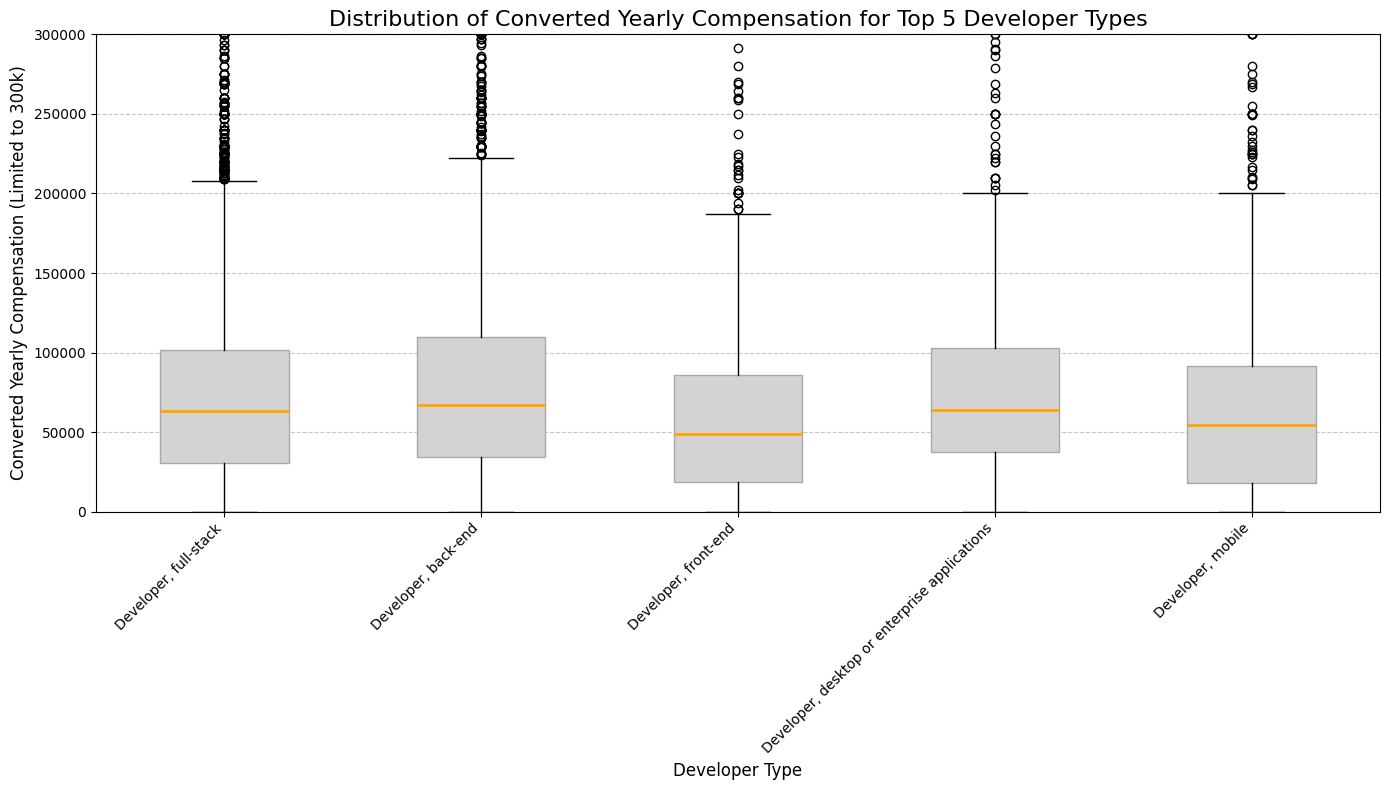

In [ ]:
# 1. SQL Query to get DevType and ConvertedCompYearly
query_dev_comp = "SELECT DevType, ConvertedCompYearly FROM main WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL"
df_dev_comp = pd.read_sql_query(query_dev_comp, conn)

# 2. Identify Top 5 Developer Types
# We count occurrences of each DevType and select the top 5
dev_type_counts = df_dev_comp['DevType'].value_counts()
top_5_dev_types = dev_type_counts.head(5).index.tolist()

# 3. Filter Data for Top 5 Developer Types
df_top_dev_comp = df_dev_comp[df_dev_comp['DevType'].isin(top_5_dev_types)].copy()

# 4. Prepare Data for Box Plot
plot_data_dev = []
for dev_type in top_5_dev_types:
    plot_data_dev.append(df_top_dev_comp[df_top_dev_comp['DevType'] == dev_type]['ConvertedCompYearly'].dropna())

# 5. Create Box Plot
plt.figure(figsize=(14, 8))
plt.boxplot(plot_data_dev, labels=top_5_dev_types, patch_artist=True,
            boxprops=dict(facecolor='lightgray', color='darkgray'),
            medianprops=dict(color='orange', linewidth=2))

# 6. Set Y-axis Limit (Adjust as necessary to visualize boxes effectively)
plt.ylim(0, 300000)

# 7. Add Labels and Title
plt.title('Distribution of Converted Yearly Compensation for Top 5 Developer Types', fontsize=16)
plt.xlabel('Developer Type', fontsize=12)
plt.ylabel('Converted Yearly Compensation (Limited to 300k)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipython-input-3863455783.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=top5, showfliers=False)


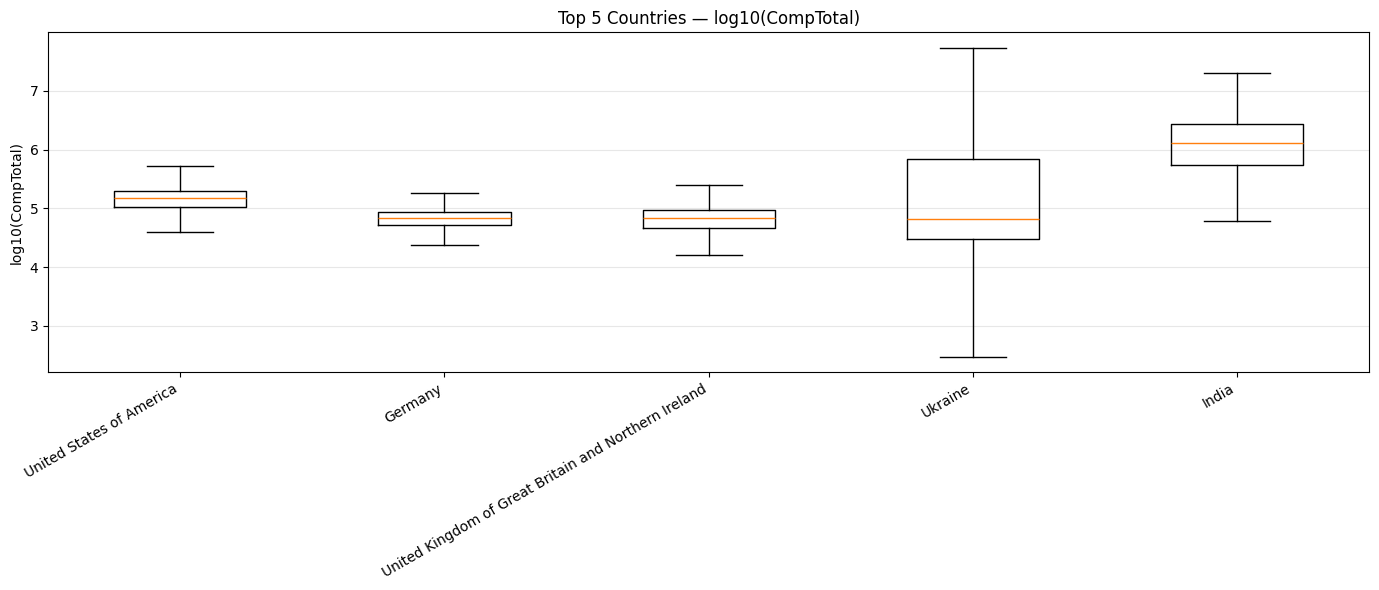

In [34]:
df = pd.read_sql_query("""
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
""", conn)

df["CompTotal"] = clean_numeric(df["CompTotal"])
df = df.dropna(subset=["Country","CompTotal"])
df = df[df["CompTotal"] > 0]

top5 = df["Country"].value_counts().head(5).index.tolist()
df = df[df["Country"].isin(top5)]

df["CompTotal_log10"] = np.log10(df["CompTotal"])

groups = [df.loc[df["Country"]==c, "CompTotal_log10"] for c in top5]

plt.figure(figsize=(14,6))
plt.boxplot(groups, labels=top5, showfliers=False)
plt.xticks(rotation=30, ha="right")
plt.title("Top 5 Countries — log10(CompTotal)")
plt.ylabel("log10(CompTotal)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Task 3.2 — CompTotal by Country
🔹 Question:

How does compensation vary geographically?

🔹 Purpose:

Understand regional pay differences.

🔹 Interpretation:

Compensation varies dramatically by country, reflecting differences in cost of living, economic development, and tech market maturity. High-income countries show higher medians and larger variance, while lower-income countries show lower but more compact distributions. This highlights the importance of geographic context when comparing salaries.

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipython-input-2991237287.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


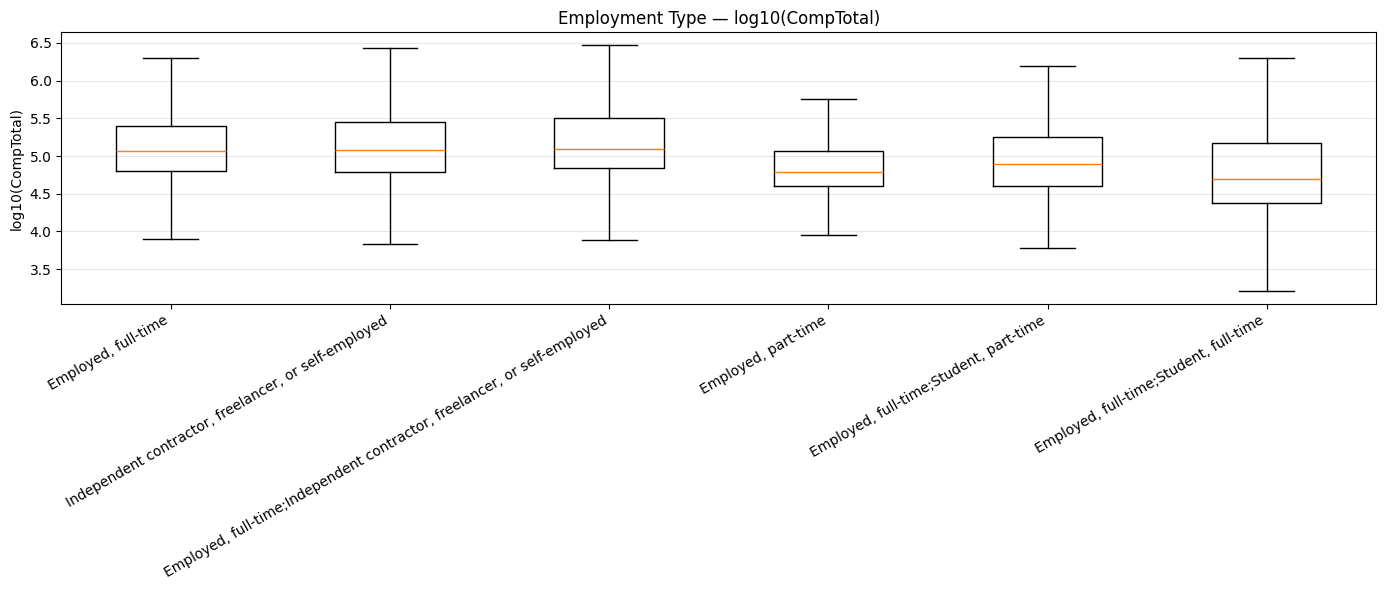

In [35]:
df = pd.read_sql_query("""
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
""", conn)

df["CompTotal"] = clean_numeric(df["CompTotal"])
df = df.dropna(subset=["Employment","CompTotal"])
df = df[df["CompTotal"] > 0]

# Optional: keep only top N employment categories if too many
top = df["Employment"].value_counts().head(6).index.tolist()
df = df[df["Employment"].isin(top)]

df["CompTotal_log10"] = np.log10(df["CompTotal"])

labels = top
groups = [df.loc[df["Employment"]==e, "CompTotal_log10"] for e in labels]

plt.figure(figsize=(14,6))
plt.boxplot(groups, labels=labels, showfliers=False)
plt.xticks(rotation=30, ha="right")
plt.title("Employment Type — log10(CompTotal)")
plt.ylabel("log10(CompTotal)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Task 4.1 — CompTotal by Employment Type
🔹 Question:

Does employment arrangement affect compensation?

🔹 Purpose:

Compare full-time, part-time, self-employed, etc.

🔹 Interpretation:

Full-time and self-employed respondents tend to show higher compensation medians and wider ranges than part-time or contract workers. This suggests stable, full-time roles and entrepreneurial paths are more strongly associated with higher income, though self-employment also shows greater variability and risk.

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [46]:
df = pd.read_sql_query("""
SELECT JobSatPoints_6, YearsCodePro
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL
""", conn)

df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")

print("min/max:", df["JobSatPoints_6"].min(), df["JobSatPoints_6"].max())
print("nunique:", df["JobSatPoints_6"].nunique())
print(df["JobSatPoints_6"].value_counts().head(15))


min/max: 0.0 100.0
nunique: 93
JobSatPoints_6
0.0      7503
20.0     4296
10.0     3226
30.0     2455
15.0     1434
25.0     1316
50.0     1216
40.0     1056
100.0     994
80.0      741
5.0       674
90.0      670
60.0      534
70.0      528
35.0      319
Name: count, dtype: int64


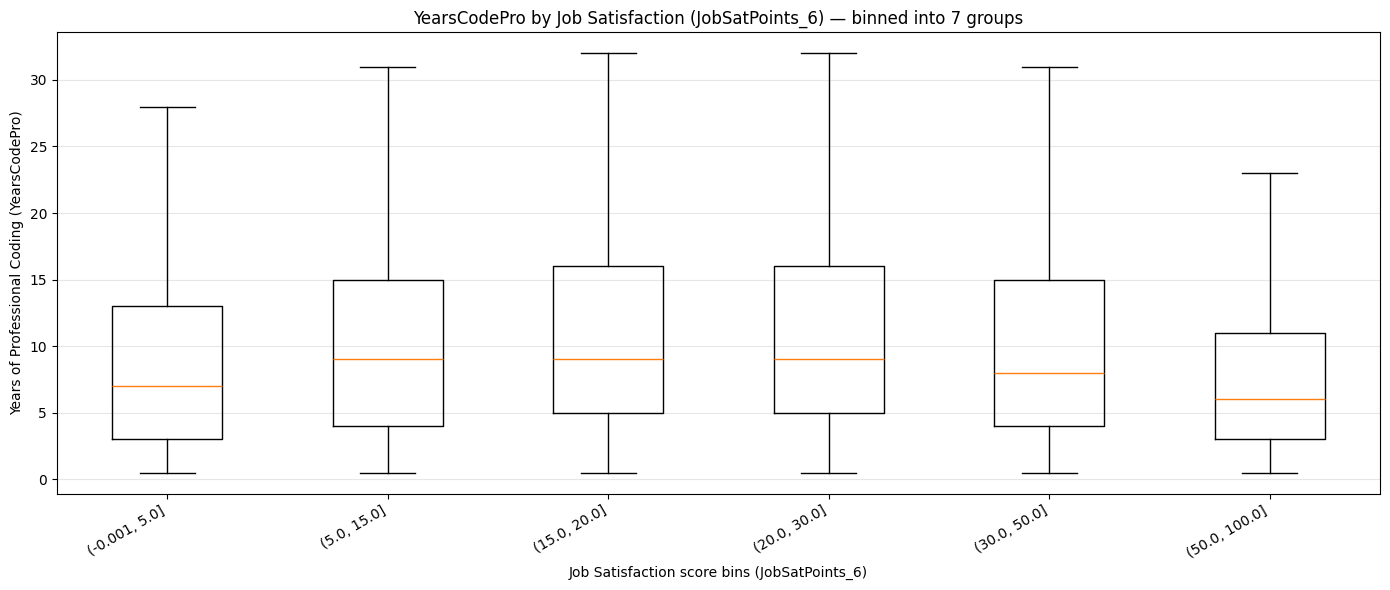

In [48]:
#Bin JobSatPoints_6 into 7 satisfaction groups

df = pd.read_sql_query("""
SELECT JobSatPoints_6, YearsCodePro
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL
""", conn)

df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")

def parse_years(x):
    if isinstance(x, str):
        x = x.strip()
        if x.lower().startswith("less"):
            return 0.5
        if x.lower().startswith("more"):
            return 51
    return pd.to_numeric(x, errors="coerce")

df["YearsCodePro_num"] = df["YearsCodePro"].apply(parse_years)
df = df.dropna(subset=["JobSatPoints_6", "YearsCodePro_num"])
df = df[df["YearsCodePro_num"] >= 0]

# ✅ Bin JobSatPoints_6 into 7 groups (equal-frequency bins)
df["JobSat_bin"] = pd.qcut(df["JobSatPoints_6"], q=7, duplicates="drop")

# Build boxplot data
bins = df["JobSat_bin"].cat.categories
box_data = [df.loc[df["JobSat_bin"] == b, "YearsCodePro_num"] for b in bins]

plt.figure(figsize=(14,6))
plt.boxplot(box_data, tick_labels=[str(b) for b in bins], showfliers=False)
plt.xticks(rotation=30, ha="right")
plt.title("YearsCodePro by Job Satisfaction (JobSatPoints_6) — binned into 7 groups")
plt.xlabel("Job Satisfaction score bins (JobSatPoints_6)")
plt.ylabel("Years of Professional Coding (YearsCodePro)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


ask 4.2.2 — YearsCodePro by Job Satisfaction
🔹 Question:

Are more experienced professionals more satisfied with their jobs?

🔹 Purpose:

See whether job satisfaction increases with experience.

🔹 Interpretation:

Higher satisfaction groups tend to have higher median years of professional experience, suggesting that experience may contribute to better job fit, autonomy, or role stability. However, variability remains high, indicating that experience alone does not guarantee satisfaction — role quality and work environment matter.

In [36]:
df = pd.read_sql_query("""
SELECT JobSatPoints_6, YearsCodePro
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL
""", conn)

print("Rows loaded:", len(df))


Rows loaded: 28619


In [37]:
# Convert JobSatPoints_6 to numeric
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")

# Convert YearsCodePro
def parse_years(x):
    if isinstance(x, str):
        x = x.strip()
        if x.lower().startswith("less"):
            return 0.5
        if x.lower().startswith("more"):
            return 51
    return pd.to_numeric(x, errors="coerce")

df["YearsCodePro_num"] = df["YearsCodePro"].apply(parse_years)

# Drop invalid rows
df = df.dropna(subset=["JobSatPoints_6", "YearsCodePro_num"])


In [38]:
print("Remaining rows:", len(df))
print("JobSatPoints_6 levels:", sorted(df["JobSatPoints_6"].unique()))
print("Counts per JobSatPoints_6:")
print(df["JobSatPoints_6"].value_counts().sort_index())


Remaining rows: 28619
JobSatPoints_6 levels: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(6.25), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(12.5), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(17.5), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(32.0), np.float64(33.0), np.float64(33.3), np.float64(33.33), np.float64(34.0), np.float64(35.0), np.float64(36.0), np.float64(37.0), np.float64(39.0), np.float64(40.0), np.float64(41.0), np.float64(42.0), np.float64(43.0), np.float64(44.0), np.float64(45.0), np.float64(46.0), np.float64(48.0), np.float64(49.0), np.float6

In [39]:
df = df[df["YearsCodePro_num"] >= 0]


/tmp/ipython-input-1738787543.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=levels, showfliers=False)


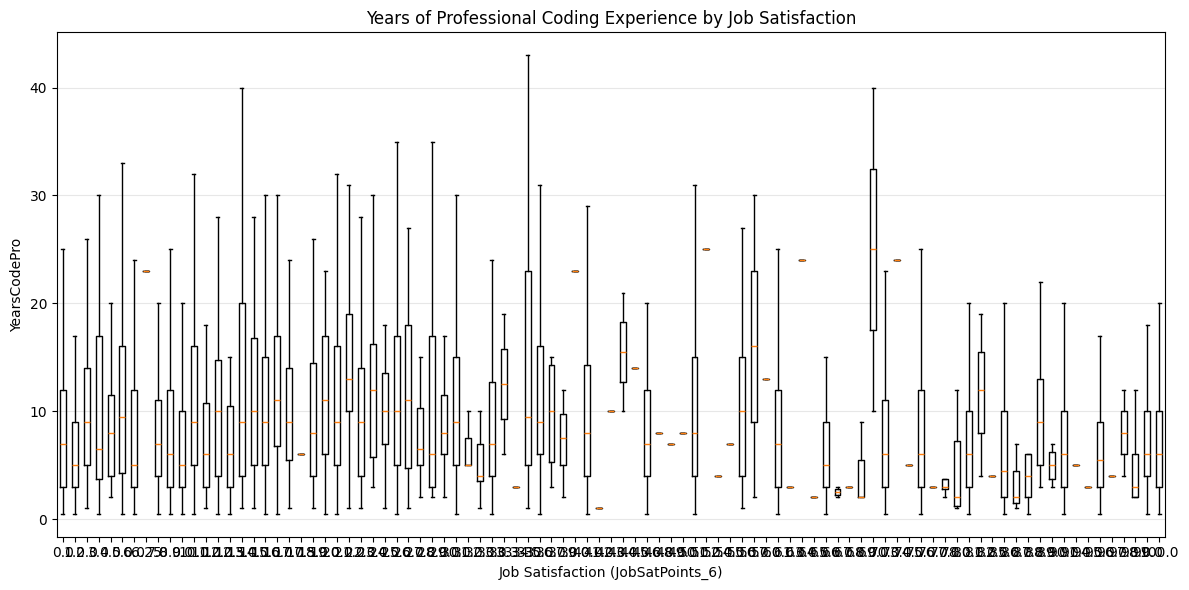

In [40]:
levels = sorted(df["JobSatPoints_6"].unique())
box_data = [df.loc[df["JobSatPoints_6"] == lv, "YearsCodePro_num"] for lv in levels]

plt.figure(figsize=(12,6))
plt.boxplot(box_data, labels=levels, showfliers=False)
plt.title("Years of Professional Coding Experience by Job Satisfaction")
plt.xlabel("Job Satisfaction (JobSatPoints_6)")
plt.ylabel("YearsCodePro")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [41]:
df = pd.read_sql_query("""
SELECT JobSatPoints_6, YearsCodePro
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL
""", conn)

df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")
print("Unique JobSatPoints_6:", df["JobSatPoints_6"].nunique())
print("Top values:\n", df["JobSatPoints_6"].value_counts().head(20))


Unique JobSatPoints_6: 93
Top values:
 JobSatPoints_6
0.0      7503
20.0     4296
10.0     3226
30.0     2455
15.0     1434
25.0     1316
50.0     1216
40.0     1056
100.0     994
80.0      741
5.0       674
90.0      670
60.0      534
70.0      528
35.0      319
8.0       145
75.0      135
9.0       117
7.0       117
12.0       86
Name: count, dtype: int64


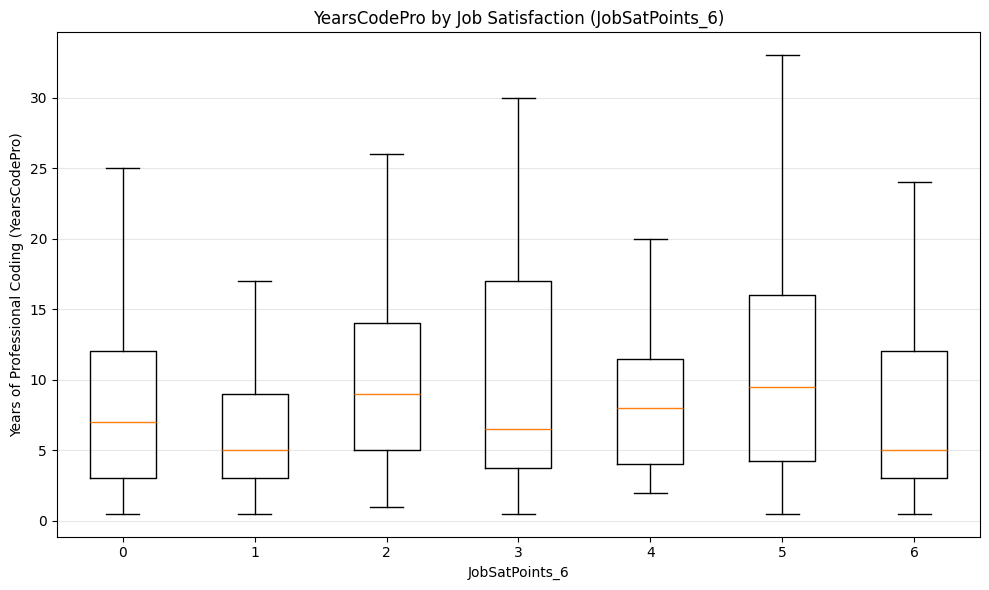

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_sql_query("""
SELECT JobSatPoints_6, YearsCodePro
FROM main
WHERE JobSatPoints_6 IS NOT NULL AND YearsCodePro IS NOT NULL
""", conn)

# Clean JobSatPoints_6
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")

# Clean YearsCodePro
def parse_years(x):
    if isinstance(x, str):
        x = x.strip()
        if x.lower().startswith("less"):
            return 0.5
        if x.lower().startswith("more"):
            return 51
    return pd.to_numeric(x, errors="coerce")

df["YearsCodePro_num"] = df["YearsCodePro"].apply(parse_years)

# Drop invalid rows
df = df.dropna(subset=["JobSatPoints_6", "YearsCodePro_num"])

# 🔥 Key fix: keep only intended scale (choose one)
df = df[df["JobSatPoints_6"].between(0, 6)]   # or between(1, 6)

# Make JobSatPoints_6 discrete integers (prevents many float levels)
df["JobSatPoints_6"] = df["JobSatPoints_6"].round().astype(int)

# Build grouped data in sorted order
levels = sorted(df["JobSatPoints_6"].unique())
box_data = [df.loc[df["JobSatPoints_6"] == lv, "YearsCodePro_num"] for lv in levels]

plt.figure(figsize=(10, 6))
plt.boxplot(box_data, tick_labels=levels, showfliers=False)
plt.title("YearsCodePro by Job Satisfaction (JobSatPoints_6)")
plt.xlabel("JobSatPoints_6")
plt.ylabel("Years of Professional Coding (YearsCodePro)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
